In [56]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
from dataset import SpeedDataset
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
tfms = get_transforms()

In [3]:
data = SpeedDataset('data/train.mp4', 'data/train.txt')

20400
20400


In [13]:
batch_size = 24

In [16]:
indices = list(range(len(data)))

validation_split = .2
split = int(np.floor(validation_split * len(data)))
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(data, batch_size=batch_size, sampler=train_sampler)
validation_loader = DataLoader(data, batch_size=batch_size, sampler=valid_sampler)

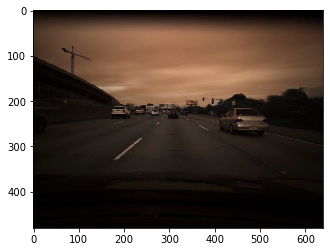

In [61]:
frame = data[100][0]
plt.imshow(frame)

In [63]:
dt = DataBunch(train_loader, validation_loader)

In [64]:
learn = cnn_learner(dt, models.resnet18, metrics=accuracy)

AttributeError: 'SpeedDataset' object has no attribute 'c'